## Imports

In [1]:
import sys
sys.path.append("/N/u/jmelms/BigRed200/FCN_Otis/data_analysis") # I know this a terrible kludgey fix, but I don't have a better one right now
from processing_utils import process_fcn_output

import xarray as xr
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

from pathlib import Path
from time import perf_counter_ns

## Load and Process Data

All of the actual work is handled in the "processing utils" function called below - see `/N/u/jmelms/BigRed200/FCN_Otis/data_analysis/processing_utils.py` to modify the config for loading data, or the obsolete notebook somewhere around here that details it further. If you modify the util function and want to see the notebook update, you'll have to restart the kernel to reload modules (they all get cached by default), or you can add the "autoreload" extension.

In [17]:
start = perf_counter_ns()
pred, time = process_fcn_output()
stop = perf_counter_ns()
diff = stop - start
time_fmt = "%Hz-%b%d"
str_t = lambda ic, t: time[ic, t].strftime(time_fmt)
print(f"Loading and processing data took {diff/1_000_000_000} seconds\n\n")
print(f"Example: IC #18 times \n{time[18]}\n\n")
print("Data: ")
pred

Loading and processing data took 13.983266153 seconds


Example: IC #18 times 
[cftime.DatetimeProlepticGregorian(2023, 10, 19, 12, 0, 0, 6, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(2023, 10, 19, 18, 0, 0, 6, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(2023, 10, 20, 0, 0, 0, 6, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(2023, 10, 20, 6, 0, 0, 6, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(2023, 10, 20, 12, 0, 0, 6, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(2023, 10, 20, 18, 0, 0, 6, has_year_zero=True)]


Data: 


<xarray.DataArray 'predicted' (ic: 39, t: 6, channel: 20, lat: 720, lon: 1440)>
array([[[[[-2.76848004e+00, -2.76848004e+00, -2.76848004e+00, ...,
           -2.76848004e+00, -2.76848004e+00, -2.76848004e+00],
          [ 5.40649871e-01,  5.40649871e-01,  5.41513848e-01, ...,
            5.41513848e-01,  5.41513848e-01,  5.41513848e-01],
          [-7.25977910e-01, -7.24249873e-01, -7.22521921e-01, ...,
           -7.25977910e-01, -7.26841886e-01, -7.26841886e-01],
          ...,
          [-5.96788200e+00, -5.94714523e+00, -5.92554599e+00, ...,
           -6.01280943e+00, -5.99812200e+00, -5.98343390e+00],
          [-5.62746496e+00, -5.61277686e+00, -5.59376871e+00, ...,
           -5.66807268e+00, -5.65079249e+00, -5.63696887e+00],
          [-5.00970266e+00, -4.99674285e+00, -4.98464685e+00, ...,
           -5.03562296e+00, -5.02698286e+00, -5.01834310e+00]],

         [[ 1.69583114e+00,  1.69583114e+00,  1.69583114e+00, ...,
            1.69583114e+00,  1.69583114e+00,  1.69583114e+00],
          [-2.07767561e+00, -2.07854030e+00, -2.07854030e+00, ...,
           -2.08113436e+00, -2.08026981e+00, -2.07854030e+00],
          [-1.85545036e+00, -1.85631505e+00, -1.85631505e+00, ...,
           -1.86150330e+00, -1.85890910e+00, -1.85717973e+00],
...
          [ 8.56392564e+01,  8.49893305e+01,  8.46982378e+01, ...,
            8.55886033e+01,  8.52816911e+01,  8.45096374e+01],
          [ 8.70556107e+01,  8.68131077e+01,  8.66267636e+01, ...,
            8.72581319e+01,  8.74396809e+01,  8.67806544e+01],
          [ 8.94998730e+01,  8.98571386e+01,  8.98680798e+01, ...,
            8.92108781e+01,  8.95731491e+01,  8.87235138e+01]],

         [[ 5.96911731e+00,  6.34683896e+00,  6.33412300e+00, ...,
            5.45747650e+00,  5.54469393e+00,  4.72319546e+00],
          [ 5.88804132e+00,  6.03922609e+00,  6.23404234e+00, ...,
            5.85409528e+00,  5.78781243e+00,  5.07586885e+00],
          [ 5.64266059e+00,  5.92492002e+00,  6.13749599e+00, ...,
            5.90547647e+00,  5.78954761e+00,  5.48306149e+00],
          ...,
          [ 2.68896984e-01,  4.07269878e-01,  4.43357045e-01, ...,
            1.63423790e-01,  2.48838223e-01,  2.78120293e-01],
          [ 4.59883433e-01,  5.00797336e-01,  3.88850386e-01, ...,
           -2.27223592e-02, -1.80177428e-01,  8.03384356e-02],
          [ 5.81020751e-01,  5.12183085e-01,  5.93084685e-01, ...,
            4.50859703e-01,  4.67752311e-01,  4.13792075e-01]]]]])
Coordinates:
  * lat      (lat) float32 90.0 89.75 89.5 89.25 ... -89.0 -89.25 -89.5 -89.75
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * channel  (channel) <U5 'u10' 'v10' 't2m' 'sp' ... 'z50' 'r500' 'r850' 'tcwv'
Dimensions without coordinates: ic, t

## Basic Heatmap

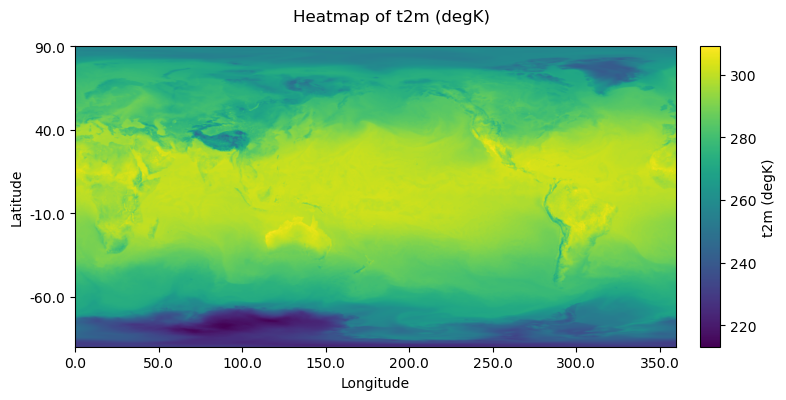

In [3]:
def context():
    ic = 0
    t = 0
    channel = "t2m"
    units = "degK"
    tstep = pred.sel(ic=ic, t=t, channel=channel)
    xticks = np.arange(0, tstep.lon.values.size, 200)
    yticks = np.arange(0, tstep.lat.values.size, 200)
    xticklabs = tstep.lon.values[xticks]
    yticklabs = tstep.lat.values[yticks]
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3.9), gridspec_kw={'width_ratios': [30, 1]})
    ax1.imshow(tstep, cmap='viridis')
    norm = Normalize(vmin=tstep.min(), vmax=tstep.max())
    cmap = cm.viridis
    scalar_mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
    fig.colorbar(scalar_mappable, label=f"{channel} ({units})", cax=ax2, fraction=0.05, pad=0.07, )
    fig.suptitle(f'Heatmap of {channel} ({units})')
    ax1.set_xlabel('Longitude')
    ax1.set_ylabel('Latitude')

    ax1.set_xticks(xticks, xticklabs)
    ax1.set_yticks(yticks, yticklabs)
    fig.tight_layout()
    fig.savefig("/N/u/jmelms/BigRed200/FCN_Otis/data_analysis/basic_heatmap.png", dpi=400)
    plt.show()

context()

## Saving each ic0 (ERA5 starting condition) for otis MSLP into a folder

In [42]:
def context():
    t = 0
    channel = "mslp"
    units = "hPa"
    bounds = dict(
        lat = (35, 5),
        lon = (235, 270)
    )
    mslp_img_dir = Path("/N/u/jmelms/BigRed200/FCN_Otis/data_analysis/figs/mslp_gif/imgs")
    fpath_gen = lambda ic: mslp_img_dir / f"mslp_era5_{ic}"
    
    all_tsteps = pred.sel(t=t, channel=channel, lat=slice(bounds["lat"][0], bounds["lat"][1]), lon=slice(bounds["lon"][0], bounds["lon"][1])) / 100
    cbar_lower, cbar_upper = all_tsteps.min(), all_tsteps.max()
    for ic in range(pred.sizes["ic"]):
        
        tstep = pred.sel(ic=ic, t=t, channel=channel, lat=slice(bounds["lat"][0], bounds["lat"][1]), lon=slice(bounds["lon"][0], bounds["lon"][1])) / 100 # Pa to hPa
        xticks = np.arange(0, tstep.lon.values.size, tstep.lon.values.size//5)
        yticks = np.arange(0, tstep.lat.values.size, tstep.lat.values.size//5)
        xticklabs = tstep.lon.values[xticks]
        yticklabs = tstep.lat.values[yticks]
        
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7.8, 6), gridspec_kw={'width_ratios': [50, 1]})
        ax1.imshow(tstep, cmap='viridis')
        if (ic > 2) and (ic < 30):
            mslp_min_idx = np.argmin(tstep.values)
            lat_idx, lon_idx = mslp_min_idx // tstep.lon.values.size, mslp_min_idx % tstep.lon.values.size
            ax1.text(lon_idx + 3, lat_idx - 3, tstep.isel(lat=lat_idx, lon=lon_idx).values.round(2), color="white")
            ax1.plot(lon_idx, lat_idx, color="white", marker=".")
        norm = Normalize(vmin=cbar_lower, vmax=cbar_upper)
        cmap = cm.viridis
        scalar_mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
        fig.colorbar(scalar_mappable, label=f"{channel} ({units})", cax=ax2, fraction=0.01, pad=0.01, )
        fig.suptitle(f'Heatmap of {channel} ({units}) at {str_t(ic, 0)}')
        ax1.set_xlabel('Longitude')
        ax1.set_ylabel('Latitude')
        ax1.set_xticks(xticks, xticklabs)
        ax1.set_yticks(yticks, yticklabs)
        fig.tight_layout()
        fig.savefig(fpath_gen(ic), dpi=400)
        plt.close()
    plt.show()

context()